## Naufal Khairul Rizky (21)
## 5025221127
## Pembelajaran Mesin B
## Tugas Model Classifier Dataset 1 (Heart Failure Prediction - Clinical Records 🏥)

##Import

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import sys
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
%matplotlib inline

## Load Dataset

In [70]:
# Load dataset
! wget -O data_churn.csv "https://drive.google.com/uc?export=download&id=15UNvEVUwxv5pS2J_iSX14PbZmysfyRM-"
df = pd.read_csv('../content/data_churn.csv') # Membaca dataset
df.head(10)

--2024-05-17 21:54:59--  https://drive.google.com/uc?export=download&id=15UNvEVUwxv5pS2J_iSX14PbZmysfyRM-
Resolving drive.google.com (drive.google.com)... 74.125.141.113, 74.125.141.102, 74.125.141.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=15UNvEVUwxv5pS2J_iSX14PbZmysfyRM-&export=download [following]
--2024-05-17 21:55:00--  https://drive.usercontent.google.com/download?id=15UNvEVUwxv5pS2J_iSX14PbZmysfyRM-&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.213.132, 2607:f8b0:400c:c0a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.213.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 223266 (218K) [application/octet-stream]
Saving to: ‘data_churn.csv’

data_churn.csv      100%[===================>] 218.03K  --.-KB/

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
5,70.0,0,232,1,30,0,302000.00,1.2,132,1,0,210,0
6,63.0,1,122,1,60,0,172000.00,1.2,145,0,0,147,0
7,70.0,1,171,0,50,1,358000.00,0.9,141,0,0,196,0
8,50.0,0,482,1,30,0,300000.00,0.9,132,1,0,109,0
9,53.0,1,446,0,45,1,274000.00,1.0,133,1,0,215,0


## Check Missing Values

In [71]:
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


## Define Features and Target

In [72]:
df.columns


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [73]:
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']] .values  #.astype(float)
X[0:5]


array([[5.5000000e+01, 0.0000000e+00, 7.4800000e+02, 0.0000000e+00,
        4.5000000e+01, 0.0000000e+00, 2.6335803e+05, 1.3000000e+00,
        1.3700000e+02, 1.0000000e+00, 1.0000000e+00, 8.8000000e+01,
        0.0000000e+00],
       [6.5000000e+01, 0.0000000e+00, 5.6000000e+01, 0.0000000e+00,
        2.5000000e+01, 0.0000000e+00, 3.0500000e+05, 5.0000000e+00,
        1.3000000e+02, 1.0000000e+00, 0.0000000e+00, 2.0700000e+02,
        0.0000000e+00],
       [4.5000000e+01, 0.0000000e+00, 5.8200000e+02, 1.0000000e+00,
        3.8000000e+01, 0.0000000e+00, 3.1900000e+05, 9.0000000e-01,
        1.4000000e+02, 0.0000000e+00, 0.0000000e+00, 2.4400000e+02,
        0.0000000e+00],
       [6.0000000e+01, 1.0000000e+00, 7.5400000e+02, 1.0000000e+00,
        4.0000000e+01, 1.0000000e+00, 3.2800000e+05, 1.2000000e+00,
        1.2600000e+02, 1.0000000e+00, 0.0000000e+00, 9.0000000e+01,
        0.0000000e+00],
       [9.5000000e+01, 1.0000000e+00, 5.8200000e+02, 0.0000000e+00,
        3.0000000e+0

In [74]:
y = df['DEATH_EVENT'].values
y[0:5]

array([0, 0, 0, 0, 1])

## Preprocessing

In [75]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.45218052, -0.95004606,  0.16509667, -0.88532653,  0.63102199,
        -0.75783066, -0.01752602, -0.06844556,  0.04296798,  0.74090938,
         1.48565948, -0.55198909, -0.67592637],
       [ 0.4028073 , -0.95004606, -0.54345778, -0.88532653, -1.10603858,
        -0.75783066,  0.40743558,  3.59619397, -1.52520648,  0.74090938,
        -0.67310175,  0.9871053 , -0.67592637],
       [-1.30716834, -0.95004606, -0.00487449,  1.12952675,  0.02305079,
        -0.75783066,  0.55030736, -0.46462281,  0.71504275, -1.34969272,
        -0.67310175,  1.46564726, -0.67592637],
       [-0.02468661,  1.05258054,  0.1712402 ,  1.12952675,  0.19675685,
         1.31955601,  0.64215351, -0.16748987, -2.42130617,  0.74090938,
        -0.67310175, -0.52612196, -0.67592637],
       [ 2.96777077,  1.05258054, -0.00487449, -0.88532653, -0.67177344,
        -0.75783066,  1.99943545,  0.62486462, -1.07715663,  0.74090938,
        -0.67310175, -1.04346461,  1.47945108]])

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4000, 13) (4000,)
Test set: (1000, 13) (1000,)


## KNN Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [78]:
# Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 0, 0, 1])

In [79]:
# Accuracy Eval
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9985
Test set Accuracy:  0.998


In [80]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1.   , 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998])

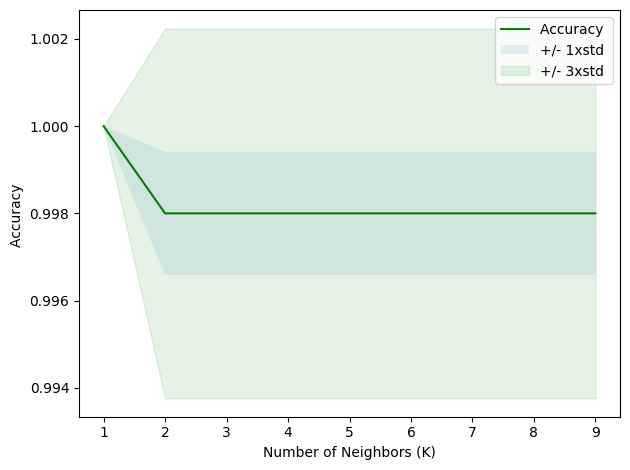

In [81]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

## Decision Tree

In [82]:
# Setting Up Decision Tree
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4000, 13) (4000,)
Test set: (1000, 13) (1000,)


In [83]:
# Modelling
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [84]:
#Prediction
predTree = drugTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

[0 0 0 0 1]
[0 0 0 0 1]


In [85]:
#Evaluation
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))
print("Decision Tree's Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_tree))

DecisionTrees's Accuracy:  1.0
Decision Tree's Test set Accuracy:  1.0


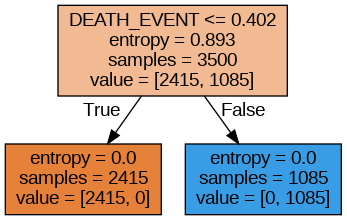

In [86]:
# Visualization to Image
from sklearn.tree import export_graphviz
export_graphviz(drugTree, out_file='tree.dot', filled=True, feature_names=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'])
!dot -Tpng tree.dot -o tree.png

# Show image
from IPython.display import Image

image_path = 'tree.png'

Image(image_path)


## Naive Baiyes

In [87]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes classifier object
nb_classifier = GaussianNB()


In [88]:
# Train Naive Bayes model
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [89]:
# Predict
yhat_nb = nb_classifier.predict(X_test)

In [90]:
# Model evaluation
print("Naive Bayes Train set Accuracy: ", metrics.accuracy_score(y_train, nb_classifier.predict(X_train)))
print("Naive Bayes Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_nb))


Naive Bayes Train set Accuracy:  1.0
Naive Bayes Test set Accuracy:  1.0


## SVM

In [91]:
from sklearn import svm

# SVM classifier object
svm_classifier = svm.SVC(kernel='rbf')


In [92]:
# Train SVM model
svm_classifier.fit(X_train, y_train)

SVC()

In [93]:
# Predict
yhat_svm = svm_classifier.predict(X_test)


In [94]:
# Model evaluation
print("SVM Train set Accuracy: ", metrics.accuracy_score(y_train, svm_classifier.predict(X_train)))
print("SVM Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_svm))

SVM Train set Accuracy:  1.0
SVM Test set Accuracy:  1.0
